4423680/4422102 [==============================] - 0s 0us/step


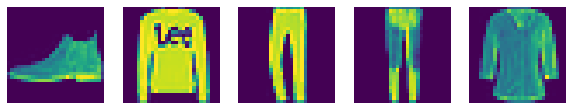

Labels: [9 2 1 1 6]


In [14]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i]) 
    plt.axis('off')
plt.show()
print('Labels: %s' % (y_test[0:5]))

In [15]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

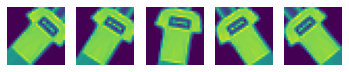

In [17]:
from keras.preprocessing.image import ImageDataGenerator

#Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)

datagen.fit(X_train)

from matplotlib import pyplot as plt

gen = datagen.flow(X_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

In [18]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32,epochs=10,validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.6605 - accuracy: 0.7498WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
60000/60000 [==============================] - 13s 222us/sample - loss: 0.6606 - accuracy: 0.7498 - val_loss: 0.4646 - val_accuracy: 0.8336
Epoch 2/10
60000/60000 [==============================] - 13s 217us/sample - loss: 0.4888 - accuracy: 0.8203 - val_loss: 0.4223 - val_accuracy: 0.8419
Epoch 3/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.4450 - accuracy: 0.8353 - val_loss: 0.3917 - val_accuracy: 0.8500
Epoch 4/10
60000/60000 [==============================]

In [19]:
print('Test accuracy:', model.evaluate(X_test, y_test))

Test accuracy: [0.3379951208114624, 0.8774]
